In [52]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [68]:

!pip install classification-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

     ---------------------------------------- 62.9/62.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import keras
import cv2 as cv
import os
from skimage import  io
from patchify import patchify, unpatchify
import segmentation_models_3D as sm

In [71]:
#for dirname, _, filenames in os.walk(r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray"):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))



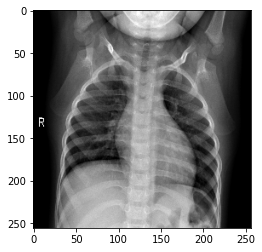

In [105]:
test = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\test"
train = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train"
val = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\val"
#Normal = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\NORMAL"
#Pneomonia = r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\PNEUMONIA"

image = cv.imread(r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\NORMAL\IM-0239-0001.jpeg")
#img_patches = patchify(image, (64, 64), step=64)
image = cv.resize(image,(256,256))
plt.imshow(image)
#Pneomonia  = cv.imread(r"C:\Users\MSI Gaming PC\Desktop\chest_xray\Chest_xray\train\PNEUMONIA")
#Pneomonia_patches = patchify(Pneomonia,(64,64),step=64)
#plt.imshow(img_patches.shape)



In [132]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

train_ds = tf.keras.utils.image_dataset_from_directory(
  train,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val,
  color_mode="grayscale",
  label_mode="binary",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

Found 624 files belonging to 2 classes.
Found 4536 files belonging to 2 classes.
Found 621 files belonging to 2 classes.


In [134]:
#MAKE MODEL;

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='ReLU', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='ReLU'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#COMPILE ADAM CROSS BINEARYENTROPY  0 OR 1
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy']
)

# TRAIN/ FIT 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
)


# P[REDICTION ] HISTORY 



Epoch 1/20
142/142 [==============================] - 9s 56ms/step - loss: 15.2212 - accuracy: 0.8763 - val_loss: 0.2470 - val_accuracy: 0.9098
Epoch 2/20
142/142 [==============================] - 8s 52ms/step - loss: 0.0875 - accuracy: 0.9667 - val_loss: 0.2001 - val_accuracy: 0.9259
Epoch 3/20
142/142 [==============================] - 8s 52ms/step - loss: 0.0499 - accuracy: 0.9795 - val_loss: 0.0828 - val_accuracy: 0.9726
Epoch 4/20
142/142 [==============================] - 8s 52ms/step - loss: 0.0343 - accuracy: 0.9877 - val_loss: 0.1182 - val_accuracy: 0.9630
Epoch 5/20
142/142 [==============================] - 8s 54ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.0747 - val_accuracy: 0.9758
Epoch 6/20
142/142 [==============================] - 8s 53ms/step - loss: 0.0288 - accuracy: 0.9896 - val_loss: 0.2251 - val_accuracy: 0.9436
Epoch 7/20
142/142 [==============================] - 8s 53ms/step - loss: 0.0297 - accuracy: 0.9914 - val_loss: 0.2135 - val_accuracy: 0.945

In [135]:
predictions = model.predict(test_ds)


20/20 [==============================] - 1s 23ms/step


In [118]:
# loop to resize all images 
print(predictions)

[[1.97480828e-01]
 [4.13721323e-01]
 [9.98958945e-01]
 [9.99709189e-01]
 [2.21834308e-15]
 [9.85015213e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99954343e-01]
 [7.01362610e-01]
 [2.41057217e-01]
 [7.59585917e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.62792709e-02]
 [1.00000000e+00]
 [3.15804183e-01]
 [9.59119201e-01]
 [9.36917484e-01]
 [9.99886155e-01]
 [9.82617438e-01]
 [5.74378371e-01]
 [1.01218466e-02]
 [1.00000000e+00]
 [8.20119023e-01]
 [1.60130425e-04]
 [1.00000000e+00]
 [9.61877644e-01]
 [9.99973416e-01]
 [9.99980450e-01]
 [9.97726738e-01]
 [9.49760973e-01]
 [2.31207639e-01]
 [9.97702897e-01]
 [9.97220993e-01]
 [6.43807173e-01]
 [1.00000000e+00]
 [9.99985099e-01]
 [9.87666607e-01]
 [8.82895827e-01]
 [9.94512677e-01]
 [1.00000000e+00]
 [9.57071066e-01]
 [1.00000000e+00]
 [9.98411059e-01]
 [1.00000000e+00]
 [3.54852468e-01]
 [9.97674525e-01]
 [9.97953176e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.98974800e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.60984700e-04]
 [9.840424

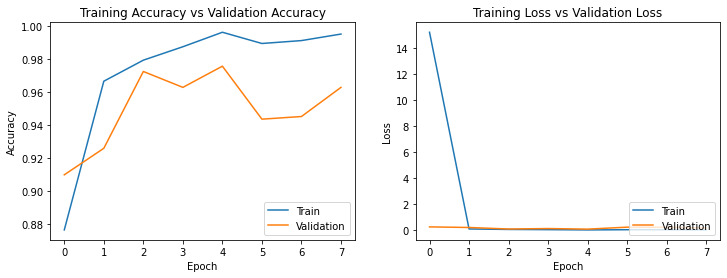

In [136]:
# graph out the loss 

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 4)

ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_title("Training Accuracy vs Validation Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend(["Train", "Validation"], loc="lower right")

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_title("Training Loss vs Validation Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Train", "Validation"], loc="lower right")

1/1 [==============================] - 0s 205ms/step
1


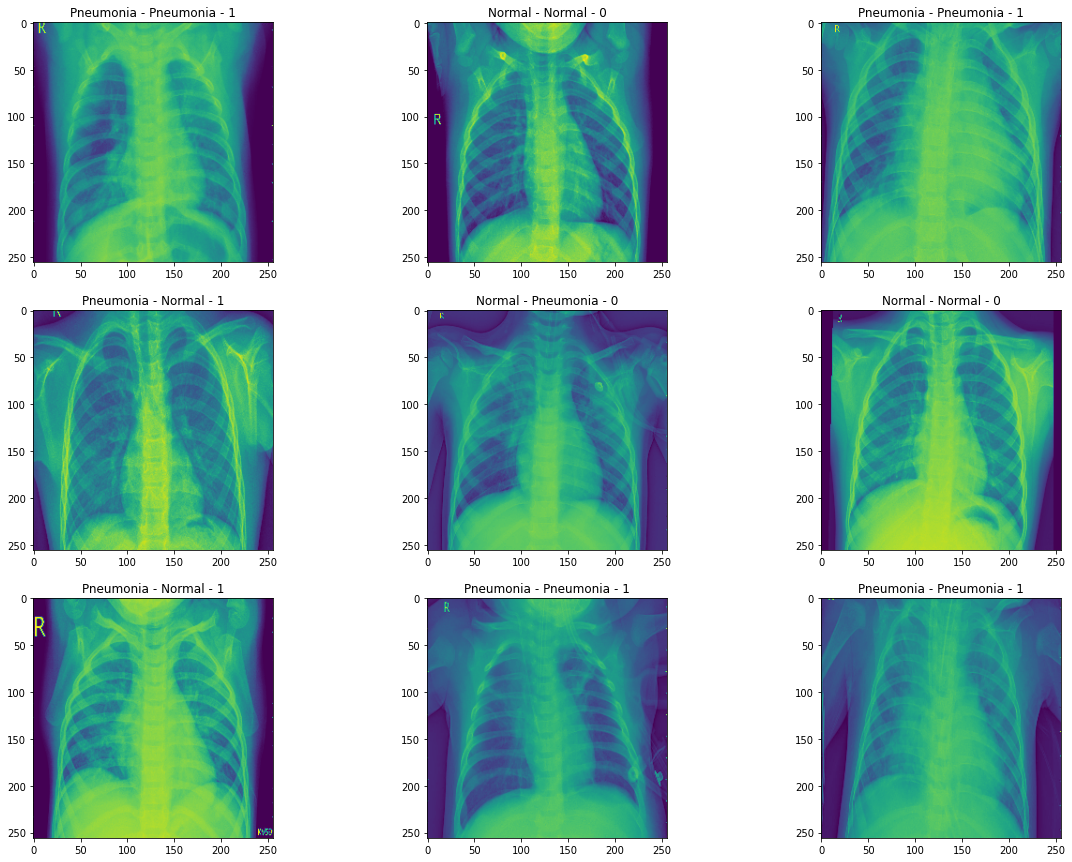

In [190]:

predict = test_ds.take(1)
prediction = model.predict(predict)
classes = ["Normal","Pneumonia"]



for images,labels in predict:
    fig, ax =plt.subplots(3,3,figsize=(20,15))
    ax = ax.ravel()
    labels = np.array(labels)
    print(int(labels[0]))
    for i in range(9):
        ax[i].imshow(images[i])
        ax[i].set_title(classes[round(prediction[i,0])]+" - "+classes[int(labels[i])]+" - "+str(round(prediction[i,0])))
        
        
    


In [16]:









import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
#with tf.device("/GPU:0"):    